In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import pickle
import nltk
from nltk.corpus import stopwords
import string
import seaborn as sns
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.svm import SVC  # Import SVM
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, ConfusionMatrixDisplay

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

In [4]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\The
[nltk_data]     Printshop\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\The
[nltk_data]     Printshop\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
# Load the dataset
df = pd.read_csv('fake reviews dataset.csv')
print(df.columns)

Index(['category', 'rating', 'label', 'text_'], dtype='object')


In [6]:
df.drop(columns = {'category'}, inplace = True)
print(df.columns)

Index(['rating', 'label', 'text_'], dtype='object')


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rating  40432 non-null  float64
 1   label   40432 non-null  object 
 2   text_   40432 non-null  object 
dtypes: float64(1), object(2)
memory usage: 947.8+ KB


In [8]:
df.rename(columns = {'text_': 'text'}, inplace = True)
df.head()

,rating,label,text
0,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,5.0,CG,"love it, a great upgrade from the original. I..."
2,5.0,CG,This pillow saved my back. I love the look and...
3,1.0,CG,"Missing information on how to use it, but it i..."
4,5.0,CG,Very nice set. Good quality. We have had the s...


In [9]:
# Function to encode the target labels
def encode_label(df):
    labels = {
        'CG': 1,  # Fake review
        'OR': 0,  # Real review
    }
    df['target'] = df['label'].map(labels)
    return df

In [10]:
# Apply the label encoding
df = encode_label(df)
df['target'] = df['target'].fillna(0).replace([np.inf, -np.inf], 0).astype(int)
df.head()

,rating,label,text,target
0,5.0,CG,"Love this! Well made, sturdy, and very comfor...",1
1,5.0,CG,"love it, a great upgrade from the original. I...",1
2,5.0,CG,This pillow saved my back. I love the look and...,1
3,1.0,CG,"Missing information on how to use it, but it i...",1
4,5.0,CG,Very nice set. Good quality. We have had the s...,1


In [11]:
# Preprocessing: Tokenization, removing stopwords, stemming
ps = PorterStemmer()

In [12]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    # Remove non-alphanumeric characters and apply stemming
    text = [ps.stem(word) for word in text if word.isalnum() and word not in stopwords.words('english')]
    
    return " ".join(text)

df.head()

,rating,label,text,target
0,5.0,CG,"Love this! Well made, sturdy, and very comfor...",1
1,5.0,CG,"love it, a great upgrade from the original. I...",1
2,5.0,CG,This pillow saved my back. I love the look and...,1
3,1.0,CG,"Missing information on how to use it, but it i...",1
4,5.0,CG,Very nice set. Good quality. We have had the s...,1


In [13]:
# Apply text transformation
df['transformed_text'] = df['text'].apply(transform_text)

In [14]:
# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['transformed_text']).toarray()
y = df['target'].values

In [15]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

In [16]:
# ---- DEEP LEARNING MODEL (Neural Network) ----
# Define the neural network architecture
deep_model = Sequential()

In [17]:
# Input layer and first hidden layer with 128 neurons
deep_model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
deep_model.add(BatchNormalization())  # Normalize the inputs to improve convergence
deep_model.add(Dropout(0.5))  # Dropout to prevent overfitting

c:\Users\The Printshop\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
# Second hidden layer with 64 neurons
deep_model.add(Dense(64, activation='relu'))
deep_model.add(Dropout(0.3))

In [19]:
# Output layer with 1 neuron for binary classification
deep_model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary output

In [20]:
# Compile the model with optimizer, loss function, and evaluation metrics
deep_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
# Train the deep learning model
history = deep_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)

Epoch 1/10
506/506 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.7545 - loss: 0.4747 - val_accuracy: 0.8597 - val_loss: 0.3637
Epoch 2/10
506/506 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8782 - loss: 0.2752 - val_accuracy: 0.8652 - val_loss: 0.3041
Epoch 3/10
506/506 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8980 - loss: 0.2331 - val_accuracy: 0.8695 - val_loss: 0.3062
Epoch 4/10
506/506 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9182 - loss: 0.1930 - val_accuracy: 0.8683 - val_loss: 0.3256
Epoch 5/10
506/506 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9322 - loss: 0.1614 - val_accuracy: 0.8697 - val_loss: 0.3277
Epoch 6/10
506/506 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9459 - loss: 0.1342 - val_accuracy: 0.8731 - val_loss: 0.3468
Epoch 7/10
506/506 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9563 - loss: 0.1090 - val_accuracy: 0.8714 - val_loss: 0.3670
Epoch 8/10
506/506 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9566 - loss: 0.1090 - val_accuracy: 0

In [22]:
# Evaluate on the test set
deep_loss, deep_accuracy = deep_model.evaluate(X_test, y_test)
y_pred_dl = (deep_model.predict(X_test) > 0.5).astype(int)

253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8651 - loss: 0.3974
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [23]:
print(f"Deep Learning Model Accuracy: {deep_accuracy}")

Deep Learning Model Accuracy: 0.8678125143051147


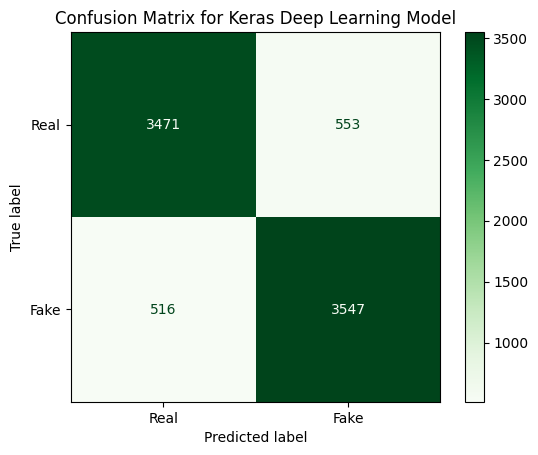

In [24]:
# Confusion Matrix for Deep Learning Model
cm_dl = confusion_matrix(y_test, y_pred_dl)
disp_dl = ConfusionMatrixDisplay(confusion_matrix=cm_dl, display_labels=['Real', 'Fake'])
disp_dl.plot(cmap=plt.cm.Greens)
plt.title('Confusion Matrix for Keras Deep Learning Model')
plt.show()

In [25]:
# ---- Saving the Deep Learning Model ----
# Save the entire model as an .h5 file (includes architecture, weights, and optimizer state)
deep_model.save('dnn_model.h5')  # This saves the model in HDF5 format

In [26]:
print("Deep Learning model saved successfully.")

Deep Learning model saved successfully.


In [27]:
# ---- SVM MODEL (Your existing code) ----
# Train an SVM model
svm_model = SVC(kernel='linear')  # You can change the kernel if needed (e.g., 'rbf', 'poly', 'sigmoid')

In [28]:
# Perform cross-validation to get accuracy across multiple splits (10-fold)
kfold = KFold(n_splits=10)  # 10-fold cross-validation

In [29]:
accuracy_scores = []
misclassification_rates = []  # This will act as a proxy for "model loss"

In [30]:
for train_index, test_index in kfold.split(X_train):
    X_train_cv, X_test_cv = X[train_index], X[test_index]
    y_train_cv, y_test_cv = y[train_index], y[test_index]

    # Fit the model on training data for this fold
    svm_model.fit(X_train_cv, y_train_cv)

    # Make predictions on the test fold
    y_pred_cv = svm_model.predict(X_test_cv)
    
    # Calculate accuracy and misclassification
    accuracy = accuracy_score(y_test_cv, y_pred_cv)
    misclassification_rate = 1 - accuracy  # Model loss proxy
    
    accuracy_scores.append(accuracy)
    misclassification_rates.append(misclassification_rate)

In [31]:
# ---- Plot Accuracy and Misclassification Rate ----
plt.figure(figsize=(30, 5))  # Significantly wider plots (30 units width)

<Figure size 3000x500 with 0 Axes>

<Figure size 3000x500 with 0 Axes>

In [32]:
# Adjust subplot spacing manually to make them more spaced out horizontally
plt.subplots_adjust(wspace=0.4)  # Increase spacing between subplots

<Figure size 640x480 with 0 Axes>

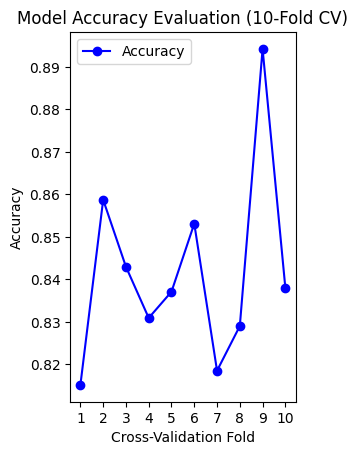

In [33]:
# Plot accuracy line
plt.subplot(1, 2, 1)
plt.plot(accuracy_scores, label='Accuracy', marker='o', color='blue')
plt.title('Model Accuracy Evaluation (10-Fold CV)')
plt.xlabel('Cross-Validation Fold')
plt.ylabel('Accuracy')
plt.xticks(ticks=np.arange(10), labels=np.arange(1, 11))  # Proper x-axis ticks for 10-fold CV
plt.legend()
plt.show()

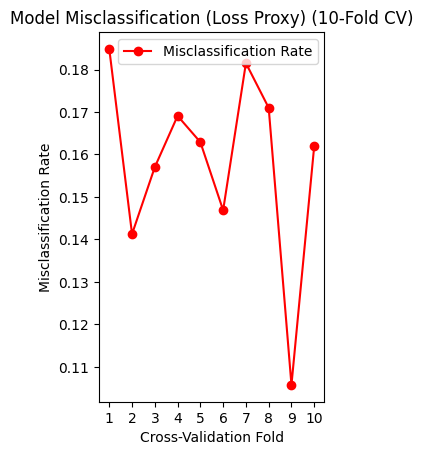

In [34]:
# Plot misclassification line
plt.subplot(1, 2, 2)
plt.plot(misclassification_rates, label='Misclassification Rate', marker='o', color='red')
plt.title('Model Misclassification (Loss Proxy) (10-Fold CV)')
plt.xlabel('Cross-Validation Fold')
plt.ylabel('Misclassification Rate')
plt.xticks(ticks=np.arange(10), labels=np.arange(1, 11))  # Proper x-axis ticks for 10-fold CV
plt.legend()
plt.show()

In [35]:
# Evaluate the SVM model on the actual test set
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')

In [36]:
print(f"Test Set Accuracy (SVM): {accuracy_svm}")
print(f"Test Set Precision (SVM): {precision_svm}")

Test Set Accuracy (SVM): 0.8675652281439347
Test Set Precision (SVM): 0.8679600029828428


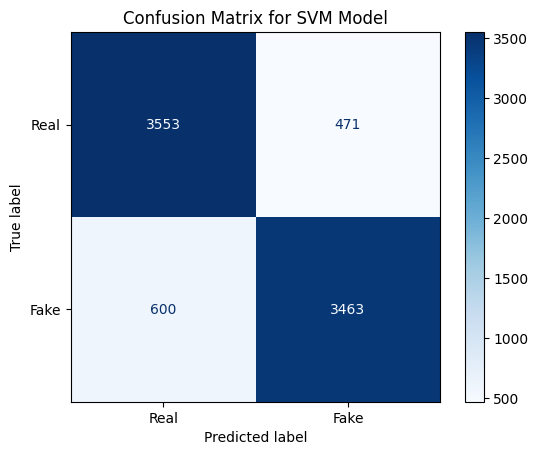

In [37]:
# Confusion Matrix for SVM Model
cm_svm = confusion_matrix(y_test, y_pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=['Real', 'Fake'])
disp_svm.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for SVM Model')
plt.show()

In [38]:
# Save the trained model and vectorizer
with open('dnn_model1.pkl', 'wb') as model_file:
    pickle.dump(svm_model, model_file)

with open('dnn_vectorizer1.pkl', 'wb') as vectorizer_file:
    pickle.dump(tfidf, vectorizer_file)

In [39]:
# Evaluate the model
#y_pred = svm_model.predict(X_test)
#accuracy = accuracy_score(y_test, y_pred)
#precision = precision_score(y_test, y_pred, average='weighted')

In [40]:
#print(f"Accuracy: {accuracy}")
#print(f"Precision: {precision}")

In [41]:
# Save the trained model and vectorizer
#with open('svm_model2.pkl', 'wb') as model_file:
    #pickle.dump(svm_model, model_file)

#with open('svm_vectorizer2.pkl', 'wb') as vectorizer_file:
    #pickle.dump(tfidf, vectorizer_file)